## Welcome to my basic Classification algorithm
Here you can train a simple model to classify hand-writen photos
resuming: The algorithm will predict which image is hand-writen at the photos

**By:Ector Magalhães**






In [2]:
#importing the libraries that we will use
import tensorflow as tf      #machine learning
import matplotlib.pyplot as plt    #plotting/loading images
import numpy as np  #linear algebra

##↪ **Below, we initialize loading the MNIST dataset**

In [4]:
mnista = tf.keras.datasets.mnist
(X_test, Y_test), (x_cv, y_cv)=mnista.load_data()

In [37]:
X_test.shape

(60000, 28, 28)

↪   You should get this result:

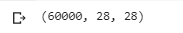


↪   **That means you have 60.000 photos that have 28x28 pixels each**

##↪Dividing by 255
Images usually receive numbers to 0 for 255. The **first** means RED, the **second** means GREEN and the **third** means BLUE.
That configures the RGB model
Dividing by 255, you can reduce the range to 0 and 1. This helps to reduce problems regarding the difference in data scale.




In [34]:

X_test= X_test /255.0
x_cv= x_cv / 255.0
labels=['0', '1', '3', '4', '5', '6', '7', '8', '9']

#↪ Here we call and import the classes for train our model
Here are our Neural network, with 3 layers.
ps: the layer **Flatten** is to convert the 2D array to 1D array. It's like you are doing a **np.reshape()**

In [35]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras import Sequential
model= Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation= 'relu'),
    Dense(10, activation='softmax')
])

##  ↪  Training our model
There you have compiler that are using the **[Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)**, [sparse categorical entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) and the metric **Accuracy**


In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, Y_test, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6333 - accuracy: 0.8400
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4211 - accuracy: 0.8864
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3583 - accuracy: 0.9000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3275 - accuracy: 0.9074
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3085 - accuracy: 0.9114
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2944 - accuracy: 0.9160
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2831 - accuracy: 0.9186
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2728 - accuracy: 0.9215
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2635 - accuracy: 0.9243
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

 ↪.fit is your final code to finally train the model, so you can put, as parameters, your train set (X_test, Y_test)

## ↪After completed, we can **evaluate our model** a very important step that show us how well our model is going
That happens putting our "second" dataset to train (x_cv, y_xv)
if the accuracy is less than the acctual accuracy (from X_test) then we are having an **Overfitting** problem
if we have a very low accuracy, we are having an **underfitting**.

In [39]:
loss, acc = model.evaluate(x_cv, y_cv, verbose=2)
acc= acc * 100
acc= str(acc)

prediction= model.predict(x_cv)
print(f'A acurácia deste modelo é de {acc[:4]}%')

313/313 - 1s - loss: 0.2479 - accuracy: 0.9285 - 680ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step
A acurácia deste modelo é de 92.8%


In [40]:
prediction.shape

(10000, 10)

↪ The code above show us the shape at prediction.
After executed, the code **.prediction** generates us an array with 10 numbers that have a **probability** of each of our number.

↪Example: propability of being 0 [2.034] **This have a low probability**
probabilit of being 6 [9.341]. **This have a high probability, so, this number should be 6**

## ↪Here you can edit to verify if the model is going well

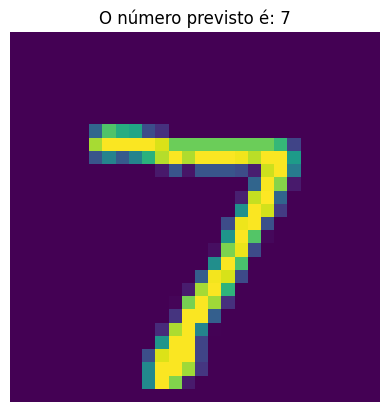

In [41]:
number_of_data= 0            #here you can set a number from 0 to 10.000 (range of images)
pos= np.argmax(prediction[number_of_data])   #Here we get the high probability of the array

plt.axis('off')
plt.title(f'The predict is: {pos}')
plt.imshow(x_cv[number_of_data])

### Thank for being here with me!
By: Ector Magalhães


**[Linkedin](https://www.linkedin.com/in/ectormgl/)**

**[Github](https://github.com/Ector-Mgl)**